In [2]:
import os
import pandas as pd

In [3]:
gmv_df = pd.read_csv("gmv_w_adas.csv")

In [7]:
gmv_df = gmv_df.drop(columns=["Unnamed: 0"])

In [8]:
gmv_df.set_index("PTID", inplace=True)

In [9]:
gmv_df

,TOTAL11,diagnosis,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,roi_6_gmv,roi_7_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
PTID,,,,,,,,,,,,,,,,,,,,,
005_S_0324,10.67,MCI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127_S_0844,19.00,AD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_1289,26.00,AD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_0030,23.00,MCI,0,236,0,978,0,1019,0,165,...,0,0,0,0,0,0,0,0,0,0
016_S_1326,17.33,MCI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116_S_0382,2.33,NL,0,0,0,43,0,34,0,0,...,0,1,0,49,0,3,0,7,0,24
032_S_1169,6.33,NL,1,0,0,0,0,0,0,0,...,137,203,2,192,48,36,6,203,43,111
136_S_0196,8.67,NL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = gmv_df.drop(columns = ["TOTAL11", "diagnosis"])
encoded_diagnosis = gmv_df['diagnosis'].astype('category').cat.codes
gmv_df["diagnosis"] = encoded_diagnosis

y = gmv_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gmv_svm = SVC(probability = True)

gmv_svm.fit(X_train, y_train)

SVC(probability=True)

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

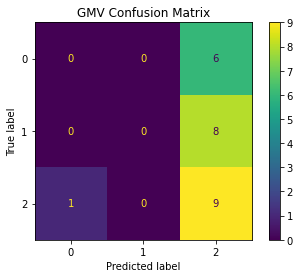

In [44]:
preds = gmv_svm.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()
plt.title("GMV Confusion Matrix")
plt.show()


In [45]:
import numpy as np

In [46]:
preds = np.array(preds)

In [47]:
preds.shape

(24,)

In [48]:
gmv_df

,TOTAL11,diagnosis,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,roi_6_gmv,roi_7_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
PTID,,,,,,,,,,,,,,,,,,,,,
005_S_0324,10.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127_S_0844,19.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_1289,26.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_0030,23.00,1,0,236,0,978,0,1019,0,165,...,0,0,0,0,0,0,0,0,0,0
016_S_1326,17.33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116_S_0382,2.33,2,0,0,0,43,0,34,0,0,...,0,1,0,49,0,3,0,7,0,24
032_S_1169,6.33,2,1,0,0,0,0,0,0,0,...,137,203,2,192,48,36,6,203,43,111
136_S_0196,8.67,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.multiclass import OneVsRestClassifier

In [50]:
ova = OneVsRestClassifier(gmv_svm)
ova.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(probability=True))

In [52]:
ova.predict_proba(X_test)

array([[0.2948781 , 0.11477824, 0.59034366],
       [0.28591823, 0.2047298 , 0.50935197],
       [0.3280193 , 0.24695668, 0.42502402],
       [0.25139583, 0.27240332, 0.47620085],
       [0.27110304, 0.32408866, 0.40480831],
       [0.27176139, 0.25002037, 0.47821824],
       [0.25948216, 0.21384184, 0.52667601],
       [0.27074941, 0.32767911, 0.40157148],
       [0.26458497, 0.33172556, 0.40368947],
       [0.25938784, 0.31705618, 0.42355598],
       [0.25387602, 0.27565137, 0.47047262],
       [0.29252232, 0.14482986, 0.56264782],
       [0.48384246, 0.16169413, 0.35446341],
       [0.28307403, 0.19181884, 0.52510712],
       [0.31265568, 0.23832155, 0.44902277],
       [0.26857234, 0.29506347, 0.43636419],
       [0.37207448, 0.242074  , 0.38585152],
       [0.39512042, 0.22472705, 0.38015254],
       [0.25353171, 0.27586472, 0.47060357],
       [0.29265383, 0.25020533, 0.45714083],
       [0.29386537, 0.14678282, 0.55935182],
       [0.34180626, 0.2099139 , 0.44827984],
       [0.

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

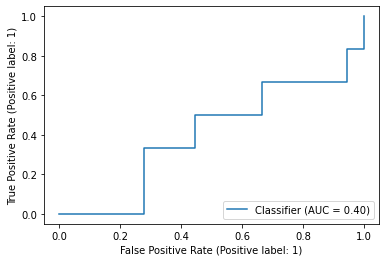

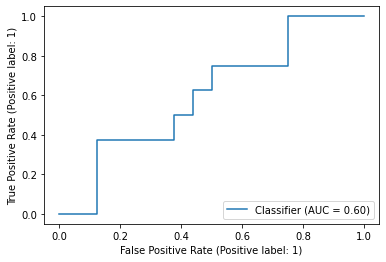

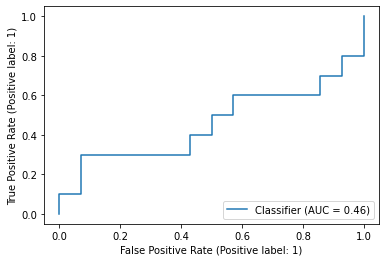

In [57]:
from sklearn.metrics import RocCurveDisplay

# svc_disp = RocCurveDisplay.from_estimator(ova, X, y)
ova_preds = ova.predict_proba(X_test)

ad_preds = ova_preds[:,0]
mci_preds = ova_preds[:,1]
nl_preds = ova_preds[:,2]

# ad_fpr, ad_tpr, _ = roc_curve(y, ad_preds)
# mci_fpr, mci_tpr, _ = roc_curve(y, mci_preds)
# nl_fpr, nl_tpr, _ = roc_curve(y, nl_preds)



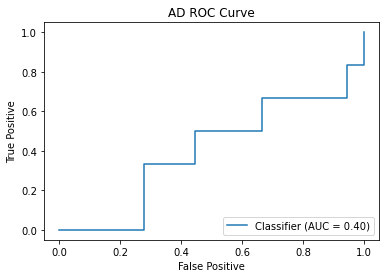

In [62]:
RocCurveDisplay.from_predictions((y_test == 0).astype(int), ad_preds)
plt.title("AD ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

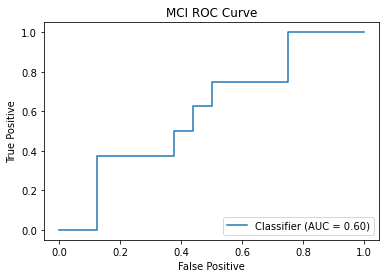

In [63]:
RocCurveDisplay.from_predictions((y_test == 1).astype(int), mci_preds)
plt.title("MCI ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

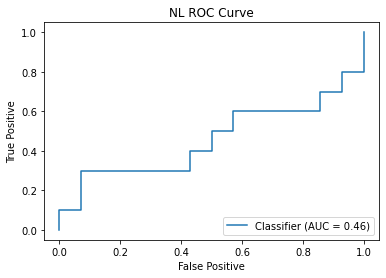

In [64]:
RocCurveDisplay.from_predictions((y_test == 2).astype(int), nl_preds)
plt.title("NL ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

In [86]:
ad_preds

array([0.27116688, 0.27116688, 0.6364618 , 0.70832195, 0.69210738,
       0.69210738, 0.69210738, 0.69210738, 0.69210738, 0.25392054,
       0.69210738, 0.6364618 , 0.70832195, 0.6364618 , 0.37378431,
       0.44017076, 0.37378431, 0.21893453, 0.21271987, 0.26722147,
       0.1997189 , 0.2211204 , 0.27116688, 0.27116688])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


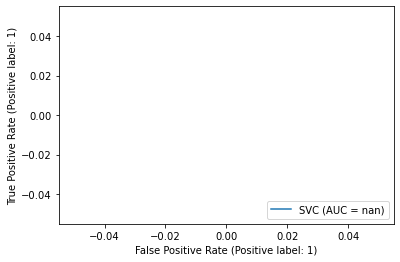

In [73]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(mci_svm, mci_X, mci_preds)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


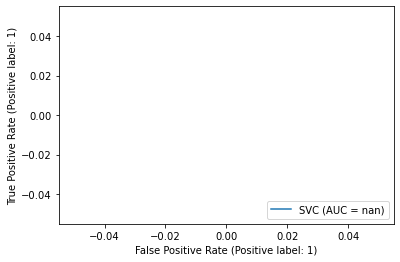

In [74]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(ad_svm, ad_X, ad_preds)
plt.show()